In [0]:
!pip install tensorflow==1.14

# Evaluar el modelo

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
session = tf.Session()

### Caso de regresión

In [0]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

batch_size = 25

In [15]:
y_vals[0:3]

array([10., 10., 10.])

In [0]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8),replace=False)
# size=round(len(x_vals)*0.8)>> 80 % del tamaño de x_vals
# replace=False >> sin repeticion

In [8]:
train_idx

array([ 12, 106,  29,  47,  78,  36, 165, 160,  21,   5,  85, 114,   1,
       133,  52, 144,  16,  60, 171, 163,  71, 178, 113,  28, 136, 127,
        24, 197,  15, 174, 108,  65,  18, 177, 112,  25, 103,  95, 129,
        92,   0, 150, 168, 111, 166,  88,   3, 172,  32,  39, 155,  87,
        34, 180, 148, 153,  74, 123,  55,  20, 157,  75,  76,  89, 159,
        59, 109, 161,  48,  66,  35,  54, 132, 175, 192,   6,   4,  63,
        70,  11,  72, 116, 198, 158, 154,  51,   9,  82, 149, 102, 110,
       193, 119, 120,  83,  42, 107, 188, 179, 199, 138, 143, 167,  49,
       147, 146, 128, 162, 124, 173,  79,  64,  69,  86,  62,  19,  84,
        96, 118,  13,  43, 183,  97,  40, 191, 122,  90, 126,  31,  38,
        73,  23, 164,  41,  77, 182, 121,  46,  98,  44, 195,  57,  56,
        30, 145, 190,   8, 181,  33, 151,  81, 131,  37,  14, 185,  22,
        45,  93,   2, 170])

In [0]:
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))
# crea un lista del conjunto del rango del tamaño de (x_vals) menos los datos entrenamiento
# (saca los datos que no estan en el grupo de entrenamiento)

In [10]:
test_idx

array([130, 134,   7, 135, 137,  10, 139, 140, 141, 142,  17, 152,  26,
        27, 156, 169, 176,  50,  53, 184,  58, 186, 187,  61, 189, 194,
        67,  68, 196,  80,  91,  94,  99, 100, 101, 104, 105, 115, 117,
       125])

In [0]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [0]:
my_prediction = tf.matmul(x_data, A) 
loss = tf.reduce_mean(tf.square(my_prediction-y_target)) # entrenamiento por bloques y funcion de perdida 
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.02)# my optimizacion
train_step = my_optim.minimize(loss)# paso de entrenamiento
init = tf.global_variables_initializer() # inicializamos las variables  
session.run(init)

In [25]:
# FASE DE ENTRENAMIENTO:
for i in range(200):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    if (i+1)%20==0:
        print('Paso #'+str(i+1)+ ", A="+str(session.run(A))+", Loss ="+
              str(session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})))

Paso #20, A=[[9.746287]], Loss =1.0355101
Paso #40, A=[[9.726986]], Loss =0.6112347
Paso #60, A=[[9.753065]], Loss =0.7501008
Paso #80, A=[[9.761335]], Loss =1.1899475
Paso #100, A=[[9.787536]], Loss =0.95722055
Paso #120, A=[[9.784335]], Loss =0.71436113
Paso #140, A=[[9.752776]], Loss =1.1787452
Paso #160, A=[[9.790764]], Loss =1.0767192
Paso #180, A=[[9.788125]], Loss =0.53037554
Paso #200, A=[[9.767706]], Loss =0.9944553


#### Evaluación del modelo con MSE
(Funcion de perdida del cuadrado medio )

In [26]:
mse_train = session.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
mse_test = session.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
print("MSE en el conjunto de entrenamiento "+str(np.round(mse_train, 3)))
print("MSE en el conjunto de testing "+str(np.round(mse_test, 3)))

MSE en el conjunto de entrenamiento 0.905
MSE en el conjunto de testing 0.844


# Caso de clasificación

In [0]:
# resetea la memoria del tensor
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [0]:
batch_size = 25
x_vals = np.concatenate((np.random.normal(-2,1,100), np.random.normal(2,1,100)))
y_vals = np.concatenate((np.repeat(0.0, 100), np.repeat(1.0,100)))

x_data = tf.placeholder(shape=[1,None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1,None], dtype = tf.float32)

In [0]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [0]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [0]:
my_prediction = tf.add(x_data, A)
init = tf.global_variables_initializer()
session.run(init)

In [0]:
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_prediction, labels=y_target))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = my_optim.minimize(xentropy)

In [49]:
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_idx]]
    rand_y = [y_vals_train[rand_idx]]
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+
             "Loss = "+str(session.run(xentropy, feed_dict={x_data: rand_x, y_target:rand_y})))

Paso #100, A = [9.361151]Loss = 3.5909147
Paso #200, A = [6.828812]Loss = 2.8222244
Paso #300, A = [4.413332]Loss = 1.6069351
Paso #400, A = [2.462751]Loss = 0.3110057
Paso #500, A = [1.2676322]Loss = 0.45377156
Paso #600, A = [0.6366206]Loss = 0.18967225
Paso #700, A = [0.2976025]Loss = 0.1384612
Paso #800, A = [0.1405232]Loss = 0.19825459
Paso #900, A = [0.03308811]Loss = 0.21479398
Paso #1000, A = [-0.02349778]Loss = 0.15040378
Paso #1100, A = [-0.05202718]Loss = 0.19458139
Paso #1200, A = [-0.01639368]Loss = 0.18643834
Paso #1300, A = [-0.04186008]Loss = 0.17624694
Paso #1400, A = [-0.07152124]Loss = 0.16716145
Paso #1500, A = [-0.0587335]Loss = 0.2101121
Paso #1600, A = [-0.05365586]Loss = 0.1896208
Paso #1700, A = [-0.06399881]Loss = 0.24892464
Paso #1800, A = [-0.05648068]Loss = 0.1627044
Paso #1900, A = [-0.04665721]Loss = 0.23066996
Paso #2000, A = [-0.07398354]Loss = 0.15035754


#### Evaluar el modelo con la precisión (Accuracy)
Porcentaje de asiertos



In [0]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
acc_train = session.run(accuracy, feed_dict={x_data:[x_vals_train], y_target: [y_vals_train]})
acc_test = session.run(accuracy, feed_dict={x_data:[x_vals_test], y_target: [y_vals_test]})

In [52]:
print("Precisión en el conjunto de entrenamiento: "+str(acc_train))
print("Precisión en el conjunto de testing: "+ str(acc_test))

Precisión en el conjunto de entrenamiento: 0.96875
Precisión en el conjunto de testing: 0.975


#### Visualización de los modelos

In [53]:
A_result = session.run(A)
A_result

array([-0.07398354], dtype=float32)

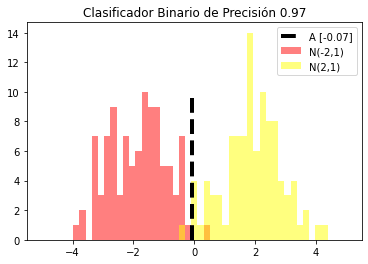

In [54]:
bins = np.linspace(-5,5,50)
plt.hist(x_vals[0:100], bins, alpha=0.5, label = "N(-2,1)", color="red")
plt.hist(x_vals[100:200], bins, alpha=0.5, label="N(2,1)", color="yellow")
plt.plot((A_result, A_result), (0, 10), "k--", linewidth = 4, label = "A "+str(np.round(A_result,2)))
plt.legend(loc="upper right")
plt.title("Clasificador Binario de Precisión "+str(np.round(acc_train,2)))
plt.show()